In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'amounts': np.random.uniform(1, 1000, 2000),
    'transaction_time': np.random.choice(pd.date_range(datetime.now() - timedelta(days=365), datetime.now(), freq='H'), 2000),
    'fraud_tag': np.random.choice([0, 1], 2000),
    'time_since_last_expiration_date': np.random.randint(1, 365, 2000),
    'count_of_apple_ids_last_24h': np.random.randint(1, 10, 2000),
    'count_of_apple_ids_last_30d': np.random.randint(10, 100, 2000),
    'days_since_card_active': np.random.randint(1, 365, 2000),
    'avs_address_mismatch_indicator': np.random.choice([0, 1], 2000),
    'days_since_address_change': np.random.randint(1, 365, 2000),
    'days_since_phone_change': np.random.randint(1, 365, 2000),
}

df = pd.DataFrame(data)


In [2]:
df.head()

,amounts,transaction_time,fraud_tag,time_since_last_expiration_date,count_of_apple_ids_last_24h,count_of_apple_ids_last_30d,days_since_card_active,avs_address_mismatch_indicator,days_since_address_change,days_since_phone_change
0,375.165579,2023-08-14 01:17:22.970818,0,15,6,96,296,1,290,42
1,950.763592,2023-01-24 13:17:22.970818,0,62,8,84,356,1,341,21
2,732.261948,2023-04-10 01:17:22.970818,1,155,3,43,276,0,88,10
3,599.059826,2023-06-03 22:17:22.970818,1,284,1,42,239,0,192,313
4,156.862622,2024-01-05 08:17:22.970818,1,209,4,35,69,1,153,153


In [3]:
df['amount_category'] = pd.cut(df['amounts'], bins=[0, 100, 500, 1000], labels=['low', 'medium', 'high'])


In [6]:
del df['amount_category']

In [7]:
df.head()

,amounts,transaction_time,fraud_tag,time_since_last_expiration_date,count_of_apple_ids_last_24h,count_of_apple_ids_last_30d,days_since_card_active,avs_address_mismatch_indicator,days_since_address_change,days_since_phone_change
0,375.165579,2023-08-14 01:17:22.970818,0,15,6,96,296,1,290,42
1,950.763592,2023-01-24 13:17:22.970818,0,62,8,84,356,1,341,21
2,732.261948,2023-04-10 01:17:22.970818,1,155,3,43,276,0,88,10
3,599.059826,2023-06-03 22:17:22.970818,1,284,1,42,239,0,192,313
4,156.862622,2024-01-05 08:17:22.970818,1,209,4,35,69,1,153,153


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
X = df.drop(['transaction_time', 'fraud_tag'], axis=1)
y = df['fraud_tag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.555
Confusion Matrix:
[[123  91]
 [ 87  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       214
           1       0.52      0.53      0.53       186

    accuracy                           0.56       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.56      0.56      0.56       400



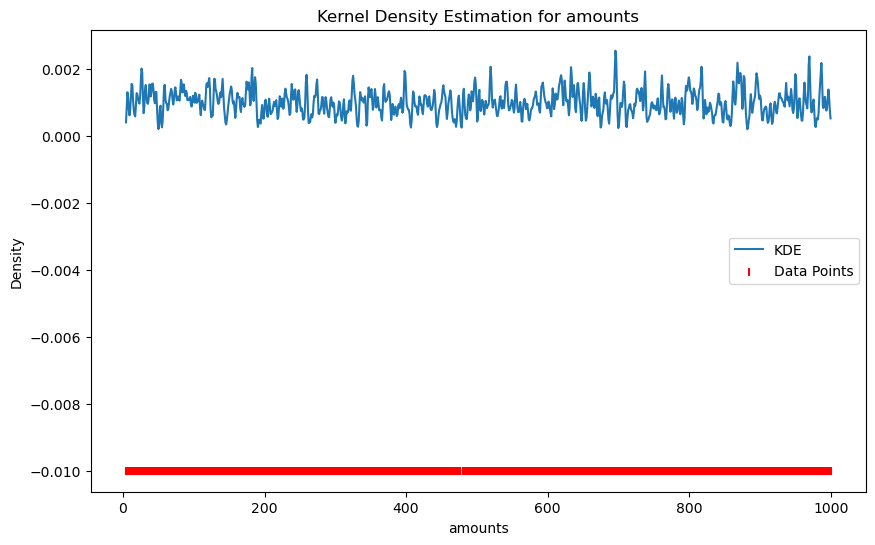

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns

# Assuming 'amounts' is the variable for which you want to perform KDE
feature_name = 'amounts'

# Extract the feature for KDE
data_for_kde = df[feature_name].values.reshape(-1, 1)

# Fit the Kernel Density Estimation model
kde_model = KernelDensity(bandwidth=1.0, kernel='gaussian')  # You can adjust bandwidth and kernel as needed
kde_model.fit(data_for_kde)

# Generate a range of values for which to estimate the density
x_vals = np.linspace(min(data_for_kde), max(data_for_kde), 1000).reshape(-1, 1)

# Get the log-density estimates for the range of values
log_densities = kde_model.score_samples(x_vals)

# Plot the KDE
plt.figure(figsize=(10, 6))
plt.plot(x_vals, np.exp(log_densities), label='KDE')
plt.scatter(data_for_kde, np.full_like(data_for_kde, -0.01), marker='|', color='r', label='Data Points')  # Show data points
plt.title(f'Kernel Density Estimation for {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Density')
plt.legend()
plt.show()


In [12]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Assuming 'amounts' is the variable for which you want to perform KDE
feature_name = 'amounts'

# Extract the feature for KDE
data_for_kde = df[feature_name].values.reshape(-1, 1)

# Fit the Kernel Density Estimation model
kde_model = KernelDensity(bandwidth=1.0, kernel='gaussian')  # You can adjust bandwidth and kernel as needed
kde_model.fit(data_for_kde)

# Get the log-density estimates for each data point
kde_scores = kde_model.score_samples(data_for_kde)

# Add the KDE scores as a new feature to the DataFrame
df[f'{feature_name}_kde_score'] = kde_scores


In [13]:
df.head()

,amounts,transaction_time,fraud_tag,time_since_last_expiration_date,count_of_apple_ids_last_24h,count_of_apple_ids_last_30d,days_since_card_active,avs_address_mismatch_indicator,days_since_address_change,days_since_phone_change,amounts_kde_score
0,375.165579,2023-08-14 01:17:22.970818,0,15,6,96,296,1,290,42,-6.640104
1,950.763592,2023-01-24 13:17:22.970818,0,62,8,84,356,1,341,21,-6.304737
2,732.261948,2023-04-10 01:17:22.970818,1,155,3,43,276,0,88,10,-6.588846
3,599.059826,2023-06-03 22:17:22.970818,1,284,1,42,239,0,192,313,-7.087838
4,156.862622,2024-01-05 08:17:22.970818,1,209,4,35,69,1,153,153,-6.890633


In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

def create_kde_features(df, variable_list, bandwidth=1.0, kernel='gaussian'):
    """
    Create new features using KDE scores for the specified variables in the DataFrame.

    Parameters:
    - df: DataFrame containing the dataset.
    - variable_list: List of variable names for which KDE scores should be calculated.
    - bandwidth: Bandwidth parameter for the KDE model.
    - kernel: Kernel type for the KDE model.

    Returns:
    - Updated DataFrame with KDE scores as new features.
    """

    for feature_name in variable_list:
        # Extract the feature for KDE
        data_for_kde = df[feature_name].values.reshape(-1, 1)

        # Fit the Kernel Density Estimation model
        kde_model = KernelDensity(bandwidth=bandwidth, kernel=kernel)
        kde_model.fit(data_for_kde)

        # Get the log-density estimates for each data point
        kde_scores = kde_model.score_samples(data_for_kde)

        # Add the KDE scores as a new feature to the DataFrame
        df[f'{feature_name}_kde_score'] = kde_scores

    return df

# Example usage:
# Assuming 'amounts', 'time_since_last_expiration_date', and 'days_since_card_active' are your variables
variable_list = ['amounts', 'time_since_last_expiration_date', 'days_since_card_active',
                'count_of_apple_ids_last_24h', 'count_of_apple_ids_last_30d',
                'avs_address_mismatch_indicator', 'days_since_address_change',
                'days_since_phone_change']

        
# Creating new features using KDE scores
df = create_kde_features(df, variable_list, bandwidth=1.0, kernel='gaussian')

# Display the updated DataFrame
print(df.head())


      amounts           transaction_time  fraud_tag  \
0  375.165579 2023-08-14 01:17:22.970818          0   
1  950.763592 2023-01-24 13:17:22.970818          0   
2  732.261948 2023-04-10 01:17:22.970818          1   
3  599.059826 2023-06-03 22:17:22.970818          1   
4  156.862622 2024-01-05 08:17:22.970818          1   

   time_since_last_expiration_date  count_of_apple_ids_last_24h  \
0                               15                            6   
1                               62                            8   
2                              155                            3   
3                              284                            1   
4                              209                            4   

   count_of_apple_ids_last_30d  days_since_card_active  \
0                           96                     296   
1                           84                     356   
2                           43                     276   
3                           42    

In [17]:
list(df)

['amounts',
 'transaction_time',
 'fraud_tag',
 'time_since_last_expiration_date',
 'count_of_apple_ids_last_24h',
 'count_of_apple_ids_last_30d',
 'days_since_card_active',
 'avs_address_mismatch_indicator',
 'days_since_address_change',
 'days_since_phone_change',
 'amounts_kde_score',
 'time_since_last_expiration_date_kde_score',
 'days_since_card_active_kde_score',
 'count_of_apple_ids_last_24h_kde_score',
 'count_of_apple_ids_last_30d_kde_score',
 'avs_address_mismatch_indicator_kde_score',
 'days_since_address_change_kde_score',
 'days_since_phone_change_kde_score']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'fraud_tag' is the target variable, and other relevant features are present in the DataFrame
target_variable = 'fraud_tag'
#relevant_features = [col for col in df.columns if col not in [target_variable]]
relevant_features = ['amounts',
 'time_since_last_expiration_date',
 'count_of_apple_ids_last_24h',
 'count_of_apple_ids_last_30d',
 'days_since_card_active',
 'avs_address_mismatch_indicator',
 'days_since_address_change',
 'days_since_phone_change',
 'amounts_kde_score',
 'time_since_last_expiration_date_kde_score',
 'days_since_card_active_kde_score',
 'count_of_apple_ids_last_24h_kde_score',
 'count_of_apple_ids_last_30d_kde_score',
 'avs_address_mismatch_indicator_kde_score',
 'days_since_address_change_kde_score',
 'days_since_phone_change_kde_score']

# Split the data into features (X) and target variable (y)
X = df[relevant_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

# Print feature importance
feature_importance = clf.feature_importances_
feature_importance_dict = dict(zip(relevant_features, feature_importance))

# Sort and print feature importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print('\nFeature Importance:')
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')


Model Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       214
           1       0.49      0.54      0.51       186

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400


Feature Importance:
amounts_kde_score: 0.08602922592585563
time_since_last_expiration_date: 0.08093869668420516
amounts: 0.07857399636233148
days_since_card_active_kde_score: 0.07779367835981571
days_since_card_active: 0.07729841749290202
days_since_address_change: 0.07668458618265184
days_since_phone_change_kde_score: 0.07427897586401555
days_since_address_change_kde_score: 0.07332964350068603
time_since_last_expiration_date_kde_score: 0.0732647940574398
count_of_apple_ids_last_30d_kde_score: 0.07166215319125241
days_since_phone_change: 0.07125859291151088
count_of_apple_ids_last_30d: 0.06959342349976382
count_of_apple_

Interpreting the KDE scores in the context of fraud detection involves understanding the probability density of data points given the estimated distribution. Here's a general interpretation:

High KDE Scores:

Data points with high KDE scores are more likely to be part of the underlying distribution represented by your training data. In the context of fraud detection, high scores may indicate transactions or instances that closely resemble the normal, non-fraudulent behavior observed during training.
Low KDE Scores:

Data points with low KDE scores are less likely to be part of the estimated distribution. In the context of fraud detection, low scores may highlight instances that deviate from the normal patterns observed in the training data. These could potentially be anomalies or fraud patterns that were not well-represented during training.
Threshold Selection:

To use KDE scores effectively for fraud detection, you can set a threshold to classify instances as potentially fraudulent or normal. This threshold depends on the specific characteristics of your data and the trade-off between false positives and false negatives that you are willing to accept.
Monitoring Low-Density Regions:

Instances with low KDE scores are located in low-density regions of the estimated distribution. These low-density regions might correspond to less common patterns or outliers. Monitoring transactions or data points in these regions could help identify potentially fraudulent behavior that differs significantly from the norm.
Combining with Other Features:

KDE scores can be used in combination with other features in your dataset. For example, you might create a feature that combines the KDE scores with transaction amounts or time-related features. Integrating multiple sources of information can enhance the ability to detect fraud patterns.
It's important to note that the effectiveness of KDE scores as features depends on the characteristics of your data and the specific fraud patterns you are trying to capture. Additionally, it's advisable to validate the performance of the KDE-based features through experimentation and evaluation using metrics such as precision, recall, and the area under the ROC curve.

Consider adjusting the bandwidth parameter and kernel type in the KDE model to optimize its performance for your dataset and fraud detection goals.

In [ ]:
# Assuming you have KDE scores for 'amounts' and 'time_since_last_expiration_date'
df['kde_interaction'] = df['amounts_kde_score'] * df['time_since_last_expiration_date_kde_score']


In [ ]:
# Create a new feature by taking the product of two numerical variables
df['amounts_times_card_active'] = df['amounts'] * df['days_since_card_active']


In [ ]:
Product Interaction Example:

python
Copy code
# Create a new feature by taking the product of 'amounts' and 'days_since_card_active'
df['amounts_times_card_active'] = df['amounts'] * df['days_since_card_active']
Logical Interpretation:

A high value for amounts_times_card_active indicates a combination of a large transaction amount and a long duration since the card was active.
This could represent scenarios where there are substantial transactions occurring after a significant period since the card became active.
In the context of fraud detection, this interaction might help identify patterns where large transactions are made after a prolonged period of card inactivity, which could be indicative of unusual or suspicious behavior.
Fraud Detection Considerations:

Synergistic Patterns: The product interaction may capture synergistic patterns where the joint occurrence of two factors results in a higher likelihood of fraud.
Unusual Combinations: Fraudsters may exhibit unusual behavior by combining factors in unexpected ways. For example, they might conduct high-value transactions after a considerable period of inactivity to avoid detection.
Complex Relationships: Fraud patterns often involve complex relationships between multiple variables. Creating interaction features allows the model to learn these intricate relationships and potentially improve fraud detection accuracy.
It's important to note that the interpretation of feature interactions depends on the specific context of your data. Experimenting with different types of interactions and observing their impact on model performance is crucial. Feature engineering, including the creation of interaction features, is an iterative process that requires domain knowledge and a deep understanding of the fraud patterns you aim to capture.





